In [15]:
from model import IAT
import torch

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision.transforms import Compose, ToTensor, Resize, ConvertImageDtype

In [2]:
checkpoint_file_path = './checkpoint/best_Epoch_exposure.pth'

model = IAT()
state_dict = torch.load(checkpoint_file_path, map_location='cpu')
model.load_state_dict(state_dict)
model.eval()

IAT(
  (local_net): Local_pred_S(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): LeakyReLU(negative_slope=0.2, inplace=True)
    (mul_blocks): Sequential(
      (0): CBlock_ln(
        (pos_embed): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16)
        (norm1): Aff_channel()
        (conv1): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
        (conv2): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
        (attn): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), groups=16)
        (drop_path): DropPath()
        (norm2): Aff_channel()
        (mlp): CMlp(
          (fc1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): GELU()
          (fc2): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
          (drop): Dropout(p=0.0, inplace=False)
        )
      )
      (1): CBlock_ln(
        (pos_embed): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=

In [69]:
def process_imag(img_path):
    img = Image.open(img_path)
    transform = Compose([
        # Resize([1200, 900]),
        ToTensor(), 
        ConvertImageDtype(torch.float) 
    ])
    return transform(img)

In [70]:
img_path = './exposure_imgs/1.jpg'
img = process_imag(img_path)
print(img.shape)

torch.Size([3, 874, 1311])


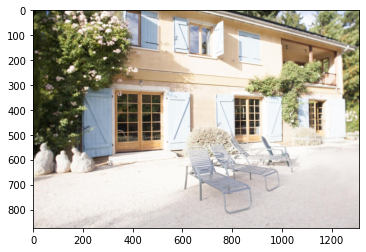

In [71]:
plt.imshow(img.permute(1, 2, 0).detach().numpy())

In [72]:
enhanced_img = model(img.unsqueeze(0))

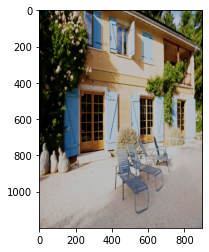

In [68]:
plt.imshow(enhanced_img[0].permute(1, 2, 0).detach().numpy())

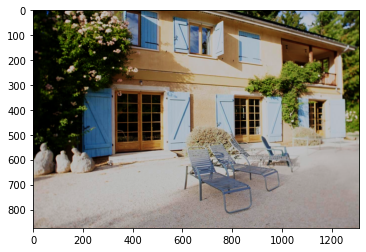

In [73]:
plt.imshow(enhanced_img[0].permute(1, 2, 0).detach().numpy())